# Assignment
by: Spitkovska Vladyslava BP-3 AM

In [200]:
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline

Problem 1. Train the polynomial regression model for the following problem with degrees 1, 4, 15. For degree 15, train a model with regularization. Try different regularization options. Make conclusions.

In [208]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

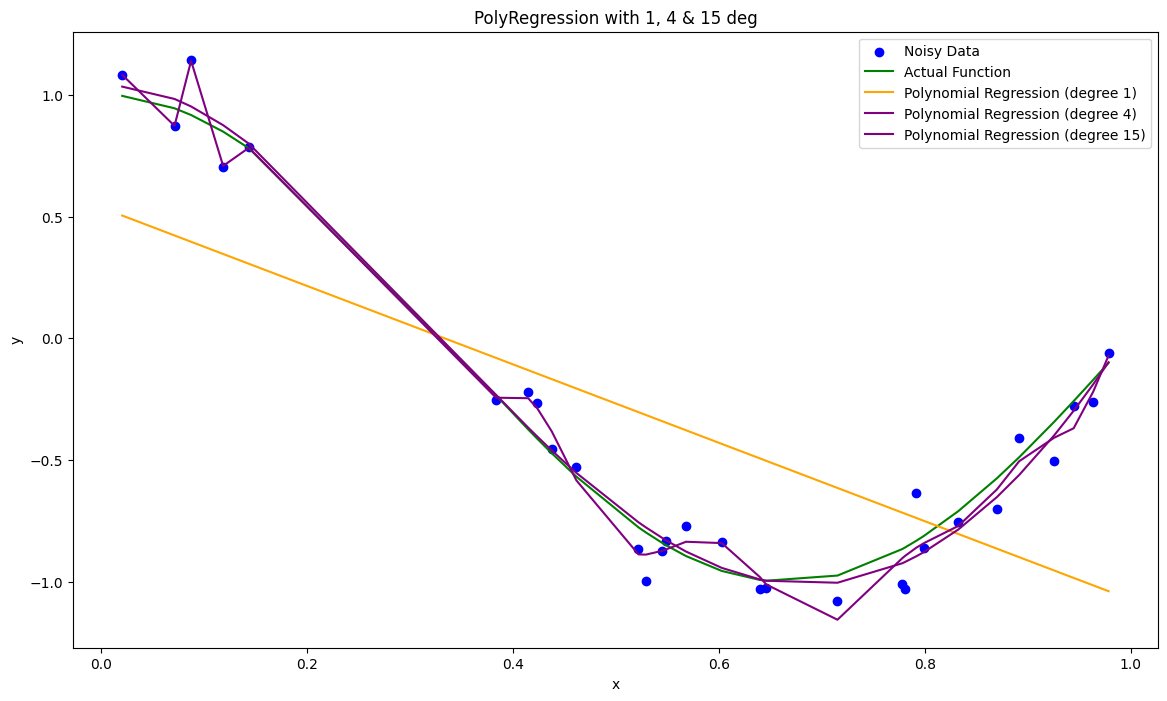

In [209]:
plt.figure(figsize=(14, 8))
plt.scatter(X, y, color='blue', label='Noisy Data')
plt.plot(X, true_fun(X), label='Actual Function', color='green')

colors = ['red', 'orange', 'purple']

# non-regularized poly models for degrees 1 &4
# 1
model = make_pipeline(PolynomialFeatures(1), LinearRegression())
model.fit(X[:, np.newaxis], y)
y_pred_1 = model.predict(X[:, np.newaxis])
plt.plot(X, y_pred_1, label=f'Polynomial Regression (degree 1)', color=colors[1])

# 4
model = make_pipeline(PolynomialFeatures(4), LinearRegression())
model.fit(X[:, np.newaxis], y)
y_pred_4 = model.predict(X[:, np.newaxis])
plt.plot(X, y_pred_4, label=f'Polynomial Regression (degree 4)', color=colors[2])

# 15
model = make_pipeline(PolynomialFeatures(15), LinearRegression())
model.fit(X[:, np.newaxis], y)
y_pred_15 = model.predict(X[:, np.newaxis])
plt.plot(X, y_pred_15, label=f'Polynomial Regression (degree 15)', color=colors[2])


plt.xlabel("x")
plt.ylabel("y")
plt.title("PolyRegression with 1, 4 & 15 deg")
plt.legend()
plt.show()

15 Deg Polynomial model seems to be overfitted

# Let's try to regularize poly-15 model in different ways and compare it with a current result

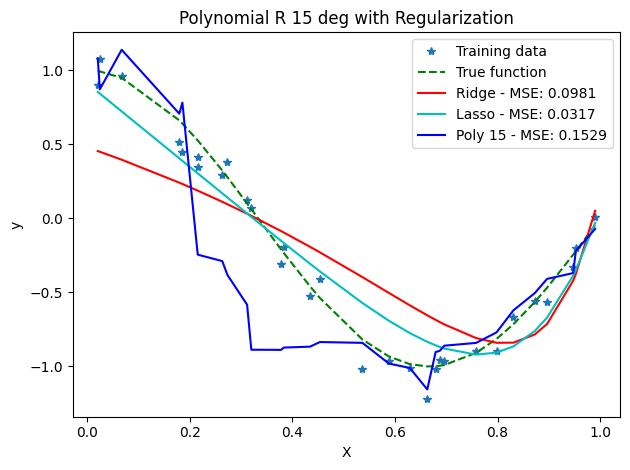

In [212]:
# Reshape X for training
X = np.sort(np.random.rand(n_samples)).reshape(-1, 1)  # Reshaped to be 2D
y = true_fun(X).ravel() + np.random.randn(n_samples) * 0.1  # y to be 1D

# Ridge regularization
ridge_model = make_pipeline(PolynomialFeatures(15), Ridge(alpha=1.0))
ridge_model.fit(X, y)
y_ridge_pred = ridge_model.predict(X)
mse_ridge = mean_squared_error(y, y_ridge_pred)

# Lasso regularization
lasso_model = make_pipeline(PolynomialFeatures(15), Lasso(alpha=0.01))
lasso_model.fit(X, y)
y_lasso_pred = lasso_model.predict(X)
mse_lasso = mean_squared_error(y, y_lasso_pred)

mse_poly15 = mean_squared_error(y, y_pred_15)
plt.plot(X, y,'*', label="Training data")
plt.plot(X, true_fun(X), 'g--', label="True function")
plt.plot(X, y_ridge_pred, 'r-', label=f"Ridge - MSE: {mse_ridge:.4f}")
plt.plot(X, y_lasso_pred, 'c-', label=f"Lasso - MSE: {mse_lasso:.4f}")
plt.plot(X, y_pred_15 , 'b-', label=f"Poly 15 - MSE: {mse_poly15:.4f}")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title("Polynomial R 15 deg with Regularization")
plt.tight_layout()
plt.show()

It's obvious here that as Ridge as Lasso Reg. are more profitable than the previous option. We can tell it at least looking at MSE metrics. Lasso  may be the most accurate option here though.

Conclusions: deg 1 model underfits the data failing to capture the non-lin trend. The 4-deg model fits the data well but shows slight overfitting (probably). Especially in parts with sparse data points. 15-deg model overfits heavily because it tries to match the noise in the data. I guess, I'd choose 4-deg model as it krrps a balance between flexibility and capturing the true trend of the data


Problem 2. For this one, you shall be builduing a small full-cycle ML development pipeline.
You are provided with Boston Housing data, but you may find a dataset of your liking to use in place of the suggested one.

1. Load the Boston Housing dataset using sklearn.datasets.load_boston()
- Explore the dataset: check its shape, features, and basic statistics


2. Split the data into features (X) and target variable (y)
- Perform any necessary scaling or normalization of the features
- Split the data into training and testing sets

3. Choose at least two different regression models from scikit-learn (e.g., LinearRegression, RandomForestRegressor, Ridge, Lasso)
- Train each model on the training data

4. Make predictions on the test set using each model
- Calculate and compare the following metrics for each model:
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)

5. Visualize the predicted vs. actual values for each model

 # Load the Boston Housing dataset using sklearn.datasets.load_boston()


 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

     Variables in order:
     CRIM     per capita crime rate by town
     ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
     INDUS    proportion of non-retail business acres per town
     CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
     NOX      nitric oxides concentration (parts per 10 million)
     RM       average number of rooms per dwelling
     AGE      proportion of owner-occupied units built prior to 1940
     DIS      weighted distances to five Boston employment centres
     RAD      index of accessibility to radial highways
     TAX      full-value property-tax rate per $10,000
     PTRATIO  pupil-teacher ratio by town
     B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
     LSTAT    % lower status of the population
     MEDV     Median value of owner-occupied homes in $1000's

In [152]:
from sklearn.datasets import fetch_openml
boston_data = fetch_openml(name='boston', version=1)
boston = boston_data.frame

In [153]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Explore the dataset: check its shape, features, and basic statistics

In [154]:
boston.shape

(506, 14)

In [155]:
boston.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [156]:
boston.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
MEDV        float64
dtype: object

In [157]:
boston.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396

In [158]:
correlation_matrix = boston.corr()

target_correlation = correlation_matrix['MEDV']

print(target_correlation)

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


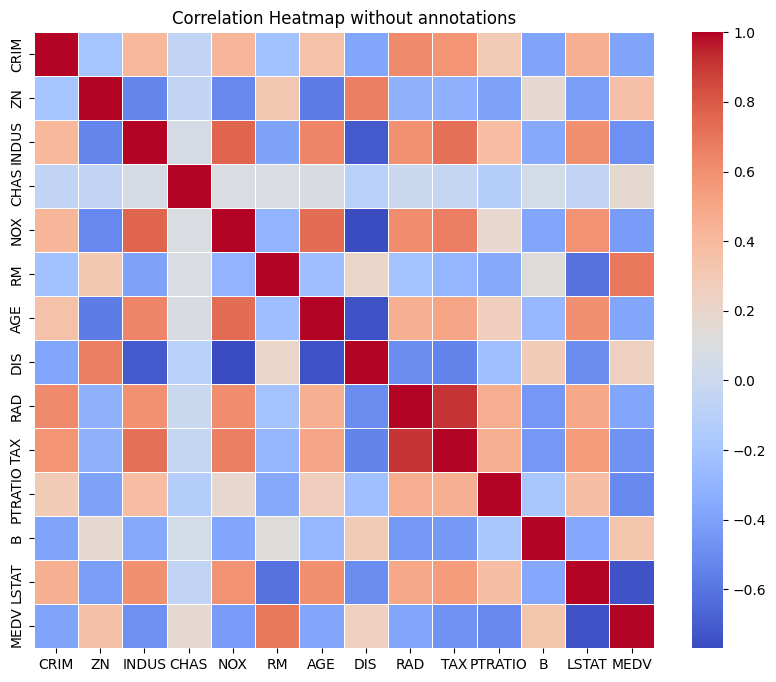

In [159]:
corr = boston.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap without annotations')
plt.show()

In [160]:
#encoding category columns
from sklearn.preprocessing import LabelEncoder
boston = pd.get_dummies(boston, columns=['CHAS', 'RAD'])

In [161]:
#turning bool to numeric for enc cols
bool_columns = boston.select_dtypes(include=['bool']).columns.tolist()
print(bool_columns)

['CHAS_0', 'CHAS_1', 'RAD_1', 'RAD_2', 'RAD_24', 'RAD_3', 'RAD_4', 'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8']


In [162]:
encoded_bools = ['CHAS_0', 'CHAS_1', 'RAD_1', 'RAD_2', 'RAD_24', 'RAD_3', 'RAD_4', 'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8']

In [163]:
for i in encoded_bools:
      boston[i] = boston[i].map({True: 1, False: 0})

In [164]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
CHAS_0       int64
CHAS_1       int64
RAD_1        int64
RAD_2        int64
RAD_24       int64
RAD_3        int64
RAD_4        int64
RAD_5        int64
RAD_6        int64
RAD_7        int64
RAD_8        int64
dtype: object

# Split the data into features (X) and target variable (y)

In [165]:
y = boston['MEDV']
X = boston.drop('MEDV', axis=1)

In [166]:
X.keys()

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'CHAS_0', 'CHAS_1', 'RAD_1', 'RAD_2', 'RAD_24', 'RAD_3',
       'RAD_4', 'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8'],
      dtype='object')

Perform any necessary scaling or normalization of the features:
Firstly i am going to normalize each feature data (column)'s type. As we could notice previously, prevailing part of dtype is category type. It's better to replace it with a numeric value

Split the data into training and testing sets

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")

Training set size: 404 samples
Test set size: 102 samples


# Choose at least two different regression models from scikit-learn

For this task I'm choosing the most standart linear regression and Random
forest.
Why? :
I'll import neccessarily libs for 2 models and evaluation down below

# Make predictions on the test set using each model
    - Calculate and compare the following metrics for each model:
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

 Train each model on the training data

# Linear Regression

In [169]:
lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

y_lin_target = lin_model.predict(X_test)

Evaluation for LR

In [170]:
# Evaluate Linear Regression Model
mse_linear = mean_squared_error(y_test, y_lin_target)
rmse_linear = np.sqrt(mse_linear)

print(f"Linear Regression - Mean Squared Error (MSE): {mse_linear}")
print(f"Linear Regression - Root Mean Squared Error (RMSE): {rmse_linear}")

Linear Regression - Mean Squared Error (MSE): 24.818442738480723
Linear Regression - Root Mean Squared Error (RMSE): 4.981811190569221


# Random Forest

In [171]:
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_rf_target = rf_model.predict(X_test)

Evaluation for RF

In [172]:
mse_rf = mean_squared_error(y_test, y_rf_target)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}")

Random Forest - Mean Squared Error: 8.080352558823533
Random Forest - Root Mean Squared Error (RMSE): 2.8425960949145646


# Ridge

In [177]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_ri_target = ridge_model.predict(X_test)

In [178]:
mse_ri = mean_squared_error(y_test, y_ri_target)
rmse_ri = np.sqrt(mse_ri)

print(f"Ridge- Mean Squared Error: {mse_ri}")
print(f"Ridge- Root Mean Squared Error (RMSE): {rmse_ri}")

Ridge- Mean Squared Error: 24.877348648992978
Ridge- Root Mean Squared Error (RMSE): 4.987719784530099


# Lasso

In [181]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_ls_target = lasso_model.predict(X_test)

In [182]:
mse_ls = mean_squared_error(y_test, y_ls_target)
rmse_ls = np.sqrt(mse_ls)

print(f"Lasso - Mean Squared Error: {mse_ls}")
print(f"Lasso - Root Mean Squared Error (RMSE): {rmse_ls}")

Lasso - Mean Squared Error: 26.996341456841492
Lasso - Root Mean Squared Error (RMSE): 5.1958003673006425


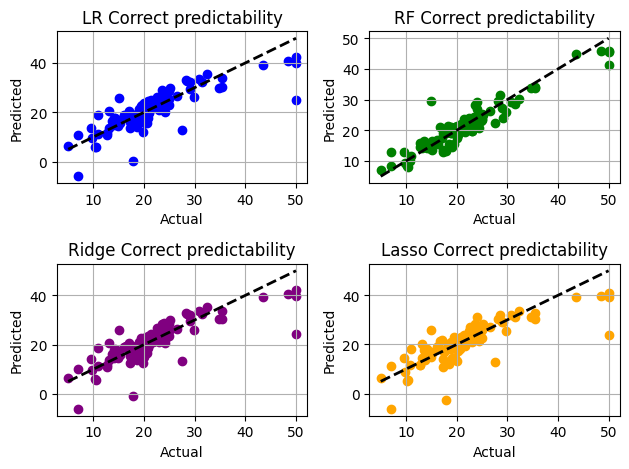

In [185]:
# Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_lin_target, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('LR Correct predictability')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

# Random Forest
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_rf_target, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('RF Correct predictability')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

# Ridge
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_ri_target, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Ridge Correct predictability')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

# Lasso
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_ls_target, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Lasso Correct predictability')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

plt.tight_layout()
plt.show()



Among all models RF demontsates the best predictability. Looking at metrics we can also see that RF model has great work accuracy indicators. I'd choose it for this particular data for the follow-up work.

Lasso appears to have the worst MSE and RMSE check results. Ridge and LR are mid for this dataset. But the difference amoung them is insignificabt

What about MSE and RMSE? Lower values indicate better model performance.
In this example RF has a lower MSE and RMSE compared to LR, which I percieved as a better performance on this dataset.
It also can be caused by the simplicity of LR algorithm and irresistance to seemly outlying correlations.